<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/6lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 6: ЗГОРТКА. РОЗРОБКА ЗГОРКОВОЇ НЕЙРОННОЇ МЕРЕЖІ


##*Мета роботи:*
засвоїти основи роботи згорткових нейронних мереж
(Convolutional Neural Networks, CNN), їх архітектуру та застосування для
розпізнавання зображень.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна (1 варіант)

##*Теоретична частина:*

***Згорткові нейронні мережі (Convolutional Neural Networks, CNN)*** – це клас
глибоких нейронних мереж, які були спеціально розроблені для обробки даних з
мультиперспективною структурою (багатовимірною, багатоканальною, тощо). У
контексті зображень мультиперспективна структура може бути матрицею
пікселів, де кожен піксель може бути представлений трьома каналами кольору
(червоний, зелений та синій). Однак CNN не обмежені лише обробкою
зображень.

Для чого використовуються згорткові нейронні мережі:

- Обробка зображень: Основна ділянка застосування CNN – це розпізнавання
зображень. Їх використовують для різних завдань, починаючи від базового
розпізнавання об'єктів на зображеннях до дуже специфічних завдань, таких
як діагностика за допомогою медичних зображень.

- Відео аналіз: Ці мережі можуть бути використані для розпізнавання дій у
відео, відстеження об'єктів тощо.
 Детектування об'єктів та семантична сегментація: Це завдання полягає в
визначенні місцезнаходження об'єктів на зображенні та виділенні окремих
об'єктів.

- Задачі обробки природної мови (NLP): Хоча CNN традиційно асоціюються
з зображеннями, вони також можуть бути ефективними в NLP. Наприклад,
вони можуть бути використані для векторизації слів або фраз.

- Розпізнавання звуку: CNN можуть аналізувати спектрограми і
використовуватися для розпізнавання мови, музичних нот або інших
звукових патернів.

Основна перевага CNN перед іншими типами нейронних мереж полягає в їх
здатності автоматично та адаптивно вчити просторові ієрархії з особливостей
зображення, що є критично важливим для обробки зображень з великим розміром
та складністю.

##*Практична частина:*

###Завдання №1

Крок 1. Завантаження та підготовка даних

In [1]:
!pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=1f6a4c98ceb9a3da650dec078fc447b1829132058427a4867999bdf47f767a0d
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


Завантажемо файли з локального комп'ютера:

In [3]:
from google.colab import files
uploaded = files.upload()


Saving download_data.py to download_data.py


In [5]:
!python download_data.py


Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 1
100% 17740/17740 [00:13<00:00, 1288.97KB/s]
100% 29/29 [00:00<00:00, 182.36KB/s]
100% 2970/2970 [00:02<00:00, 1093.65KB/s]
 83% 5/6 [00:00<00:00, 22574.29KB/s]
All dataset files downloaded!


Дані успішно завантажено. Тепер ми можемо використовувати завантажені файли для підготовки даних у Python.

У Google Colab файли за замовчуванням зберігаються у кореневій директорії /content. Ми можемо перевірити це, виконавши команду для перегляду вмісту поточної директорії:

In [6]:
!ls /content


download_data.py  t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
sample_data	  t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


Неймовірно! Файли (train-images-idx3-ubyte.gz, t10k-images-idx3-ubyte.gz, і т.д.) знаходяться в кореневій директорії /content. Тепер ми можемо використовувати їх для завантаження та підготовки даних.

In [7]:
import gzip
import idx2numpy
import numpy as np
import os

# Шлях до файлів
path = "/content"

def load_kmnist():
    with gzip.open(os.path.join(path, 'train-images-idx3-ubyte.gz'), 'r') as f:
        x_train = idx2numpy.convert_from_file(f)
    with gzip.open(os.path.join(path, 'train-labels-idx1-ubyte.gz'), 'r') as f:
        y_train = idx2numpy.convert_from_file(f)
    with gzip.open(os.path.join(path, 't10k-images-idx3-ubyte.gz'), 'r') as f:
        x_test = idx2numpy.convert_from_file(f)
    with gzip.open(os.path.join(path, 't10k-labels-idx1-ubyte.gz'), 'r') as f:
        y_test = idx2numpy.convert_from_file(f)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_kmnist()

# Нормалізація
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Переформатування для CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Train data shape: (60000, 28, 28, 1), Train labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Test labels shape: (10000,)


Чудово! Дані завантажено і підготовлено. Тепер ми можемо перейти до створення згорткової нейронної мережі (CNN) для класифікації цього датасету.

Крок 2: Побудова згорткової нейронної мережі

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Побудова моделі
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 класів у KMNIST
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Опис моделі
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Крок 3: Навчання моделі

Використовуємо 10 епох для швидкого навчання.

In [10]:
# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=256
)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 202ms/step - accuracy: 0.9976 - loss: 0.0099 - val_accuracy: 0.9454 - val_loss: 0.2618
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 195ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9487 - val_loss: 0.2585
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 202ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9463 - val_loss: 0.2840
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9497 - val_loss: 0.2838
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 194ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9501 - val_loss: 0.2852
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 196ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9477 - val_loss: 0.2991
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 212ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9461 - val_loss: 0.3290
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 205ms/step - accuracy: 0.9948 - loss: 0

###Завдання №2

Тестування різних оптимізаторів:

In [11]:
def build_model(optimizer='adam'):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),  # Додаємо Batch Normalization
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  # Додаємо Dropout

        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 регуляризація
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

optimizers = ['adam', 'sgd', 'rmsprop']
results = {}

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    model = build_model(optimizer=opt)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256, verbose=1)
    results[opt] = history.history


Training with optimizer: adam
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 323ms/step - accuracy: 0.6290 - loss: 3.1096 - val_accuracy: 0.1850 - val_loss: 3.5141
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 324ms/step - accuracy: 0.9053 - loss: 0.7215 - val_accuracy: 0.7062 - val_loss: 1.0528
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 321ms/step - accuracy: 0.9341 - loss: 0.4133 - val_accuracy: 0.9041 - val_loss: 0.5103
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 340ms/step - accuracy: 0.9463 - loss: 0.3596 - val_accuracy: 0.9344 - val_loss: 0.4072
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 328ms/step - accuracy: 0.9503 - loss: 0.3409 - val_accuracy: 0.9365 - val_loss: 0.3918
Training with optimizer: sgd
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 333ms/step - accuracy: 0.4253 - loss: 4.2863 - val_accuracy: 0.4255 - val_loss: 3.7754
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 327ms/step - accuracy: 0.7117 - loss: 2.9961 - val_accuracy: 0.6882 - val_loss: 2.9299
Epoch 3/5
235/235 ━━━━━━━━━━━━━

Аналіз функцій активації:
Замінюємо функцію активації на elu, sigmoid або tanh:

In [12]:
def build_model_with_activation(activation='relu'):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation=activation),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

activations = ['relu', 'elu', 'sigmoid', 'tanh']
activation_results = {}

for act in activations:
    print(f"Training with activation: {act}")
    model = build_model_with_activation(activation=act)
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256, verbose=1)
    activation_results[act] = history.history


Training with activation: relu
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 193ms/step - accuracy: 0.7221 - loss: 0.9098 - val_accuracy: 0.8425 - val_loss: 0.5212
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 191ms/step - accuracy: 0.9450 - loss: 0.1871 - val_accuracy: 0.8990 - val_loss: 0.3405
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 205ms/step - accuracy: 0.9659 - loss: 0.1150 - val_accuracy: 0.9162 - val_loss: 0.2915
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 191ms/step - accuracy: 0.9767 - loss: 0.0800 - val_accuracy: 0.9282 - val_loss: 0.2469
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 190ms/step - accuracy: 0.9833 - loss: 0.0608 - val_accuracy: 0.9273 - val_loss: 0.2656
Training with activation: elu
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 203ms/step - accuracy: 0.7495 - loss: 0.8250 - val_accuracy: 0.8550 - val_loss: 0.4828
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 212ms/step - accuracy: 0.9487 - loss: 0.1705 - val_accuracy: 0.9002 - val_loss: 0.3310
Epoch 3/5
235/235 ━━━━━━━━━━━

Чому навчання триває довго?  :)

Розмір датасету:

- KMNIST має 60,000 зображень у тренувальній вибірці, що достатньо багато для базової моделі.

Архітектура моделі:

- Два згорткових шари з багатьма фільтрами (32, 64) та великим повнозв’язним шаром (128 нейронів) вимагають значних обчислень.

Порівняння:

Після завершення навчання з різними параметрами, ми можемо побудувати графіки для порівняння втрат (loss) та точності (accuracy).

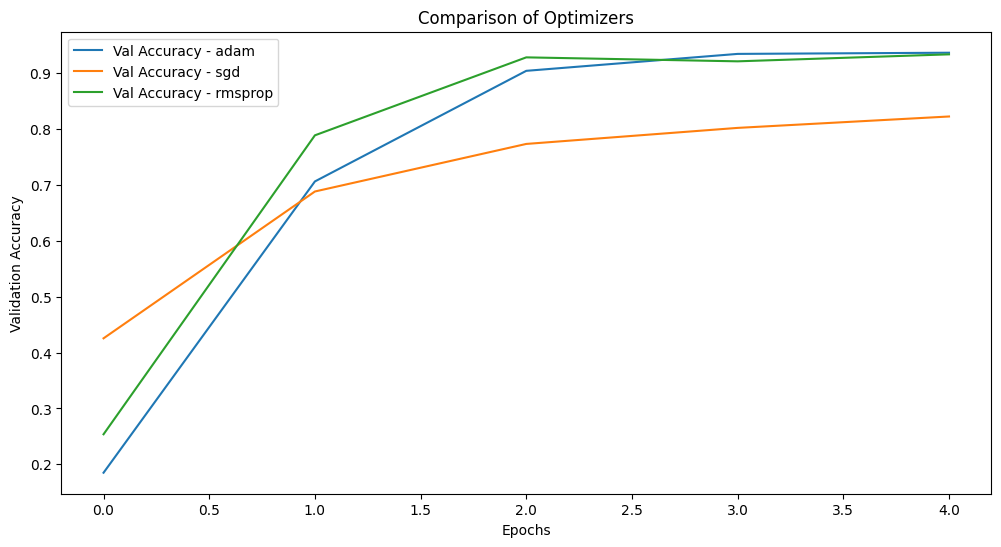

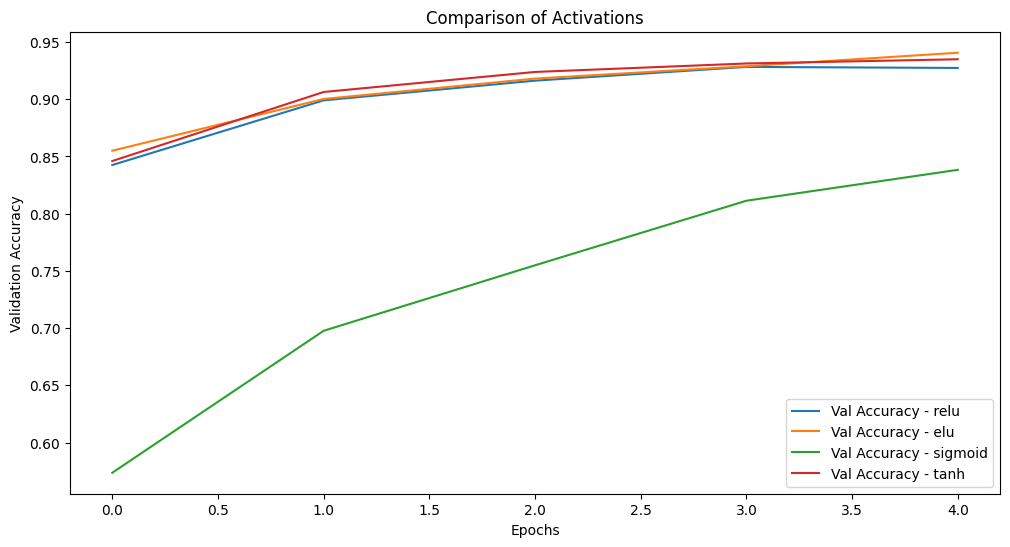

In [13]:
import matplotlib.pyplot as plt

# Порівняння оптимізаторів
plt.figure(figsize=(12, 6))
for opt, hist in results.items():
    plt.plot(hist['val_accuracy'], label=f'Val Accuracy - {opt}')
plt.title('Comparison of Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Порівняння функцій активації
plt.figure(figsize=(12, 6))
for act, hist in activation_results.items():
    plt.plot(hist['val_accuracy'], label=f'Val Accuracy - {act}')
plt.title('Comparison of Activations')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


**Аналіз графіків:**

 *Графік порівняння оптимізаторів:*

***Adam:***
- Найшвидше досяг високої точності вже на другій епосі.
- Дає найкращий результат у довгостроковій перспективі.

***RMSprop:***
- Також швидко піднімається, навіть трохи випереджає Adam на початку, але їхні результати на останній епосі схожі.

***SGD:***
- Навчається значно повільніше, точність стабільно зростає, але залишається нижчою за Adam і RMSprop.
- Це очікувано, оскільки SGD має простий механізм оновлення ваг.


***Висновок:***

- Adam є найефективнішим для цієї задачі завдяки швидкому та стабільному навчанні.
- RMSprop також гарний вибір, але Adam все ж виграє.
- SGD може підійти, якщо потрібна простота, але для швидкості й точності краще обирати інші оптимізатори.

*Графік порівняння функцій активації:*

***ReLU, ELU, Tanh:***

- Всі три функції активації показують схожі результати.
- ELU і ReLU мають незначну перевагу, досягаючи трохи вищої точності, ніж Tanh.

***Sigmoid:***

- Навчається повільніше, і точність значно нижча.
- Це пов'язано з тим, що sigmoid має проблеми з "зникненням градієнтів" у глибоких мережах.

***Висновок:***

- ReLU є найбільш підходящим варіантом для базової моделі завдяки простоті та високій продуктивності.
- ELU може бути корисною для задач із вибагливими даними, але тут не має суттєвої переваги.
- Sigmoid не варто використовувати для таких задач.

###Завдання №3

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Більш складна архітектура:

In [20]:
def build_complex_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Спрощена архітектура:

In [21]:
def build_simple_model():
    model = Sequential([
        Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Зміна розміру ядра згортки:

In [22]:
def build_model_with_larger_kernel():
    model = Sequential([
        Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Навчання моделей:

Запускаємо навчання для кожної моделі та порівнюємо результати.

In [23]:
architectures = {
    "Complex Model": build_complex_model(),
    "Simple Model": build_simple_model(),
    "Larger Kernel Model": build_model_with_larger_kernel()
}

results_architecture = {}

for name, model in architectures.items():
    print(f"Training {name}")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256, verbose=1)
    results_architecture[name] = history.history


Training Complex Model
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.6923 - loss: 0.9148 - val_accuracy: 0.8949 - val_loss: 0.3394
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.9516 - loss: 0.1617 - val_accuracy: 0.9296 - val_loss: 0.2418
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9681 - loss: 0.1022 - val_accuracy: 0.9468 - val_loss: 0.1854
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.9785 - loss: 0.0728 - val_accuracy: 0.9537 - val_loss: 0.1593
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9560 - val_loss: 0.1593
Training Simple Model
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7247 - loss: 0.9279 - val_accuracy: 0.7968 - val_loss: 0.6507
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9094 - loss: 0.3061 - val_accuracy: 0.8380 - val_loss: 0.5304
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - ac

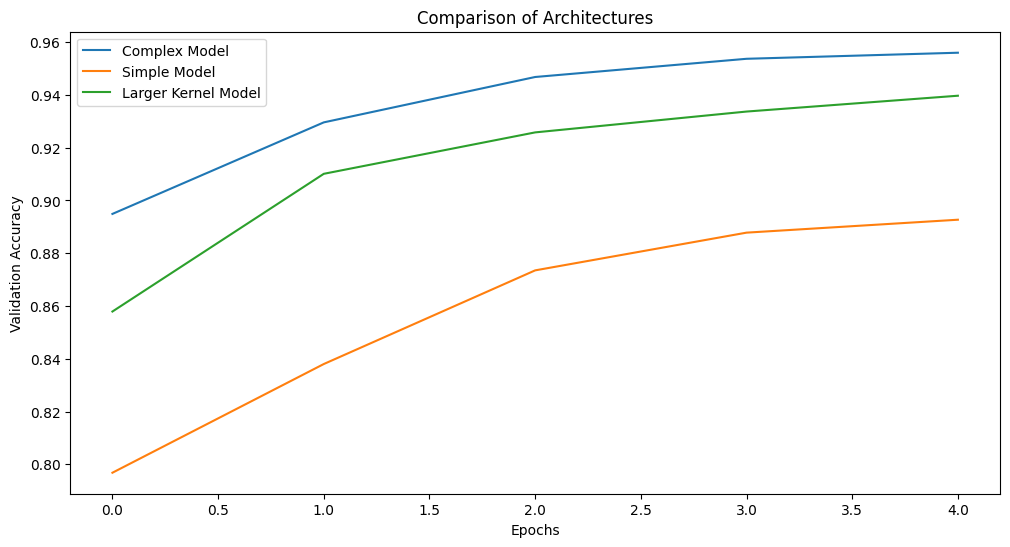

In [24]:
plt.figure(figsize=(12, 6))

for name, hist in results_architecture.items():
    plt.plot(hist['val_accuracy'], label=f'{name}')

plt.title('Comparison of Architectures')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


Аналіз результатів для різних архітектур:

***1. Складна модель (Complex Model):***

Тренування займає більше 5 хвилин на епоху через більшу кількість шарів і фільтрів.
Досягла найкращої валідаційної точності (95.60%).
Значення втрати (val_loss) також найнижче на останній епосі, що свідчить про хорошу здатність моделі до узагальнення.

***2. Спрощена модель (Simple Model):***

Навчання значно швидше (~20 секунд на епоху).
Валідаційна точність становить лише 89.27%, що на ~6% менше, ніж у складної моделі.
Спрощена архітектура не змогла повністю опрацювати складність датасету.


***3. Модель із більшим ядром згортки (Larger Kernel Model):***
Навчання займає середній час (~80 секунд на епоху).
Валідаційна точність — 93.97%, що вище, ніж у спрощеної моделі, але нижче, ніж у складної.
Модель добре навчається, але використання великих ядер (5x5) не дало значної переваги.

***Порівняння на графіку:***

Складна модель демонструє найкращі результати, досягаючи найвищої точності після 5 епох.

Спрощена модель має найнижчу точність через недостатню кількість шарів і фільтрів.

Модель із більшим ядром згортки показує середній результат, демонструючи, що збільшення розміру ядра покращує точність, але не так суттєво, як додавання шарів.

***Висновки:***

Складна модель є найкращою для задачі, але її тренування займає значний час.
Якщо час тренування є критичним, можна використовувати модель із більшим ядром згортки, яка балансує між швидкістю та точністю.
Спрощена модель підходить лише для тестування та експериментів, оскільки її продуктивність значно нижча.

###Завдання №4

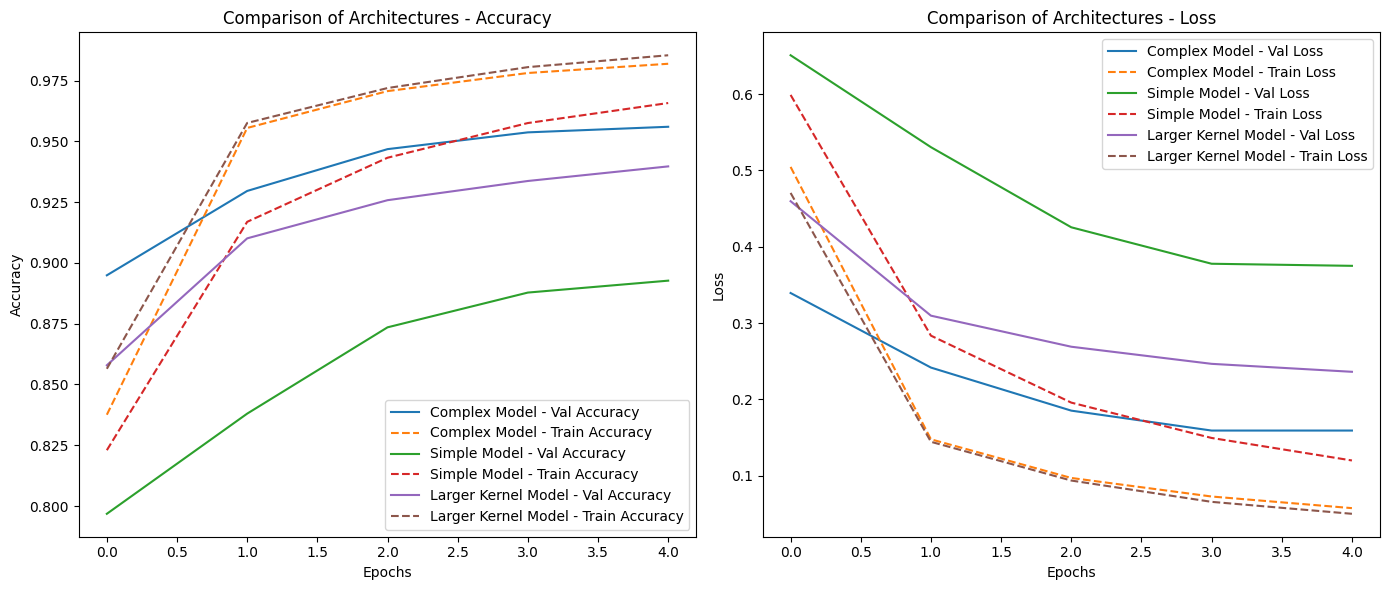

In [25]:
import matplotlib.pyplot as plt

# Функція для побудови графіків втрат та точності
def plot_results(results, title):
    plt.figure(figsize=(14, 6))

    # Візуалізація точності
    plt.subplot(1, 2, 1)
    for name, hist in results.items():
        plt.plot(hist['val_accuracy'], label=f'{name} - Val Accuracy')
        plt.plot(hist['accuracy'], linestyle='dashed', label=f'{name} - Train Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Візуалізація втрат
    plt.subplot(1, 2, 2)
    for name, hist in results.items():
        plt.plot(hist['val_loss'], label=f'{name} - Val Loss')
        plt.plot(hist['loss'], linestyle='dashed', label=f'{name} - Train Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Візуалізація для різних архітектур
plot_results(results_architecture, "Comparison of Architectures")


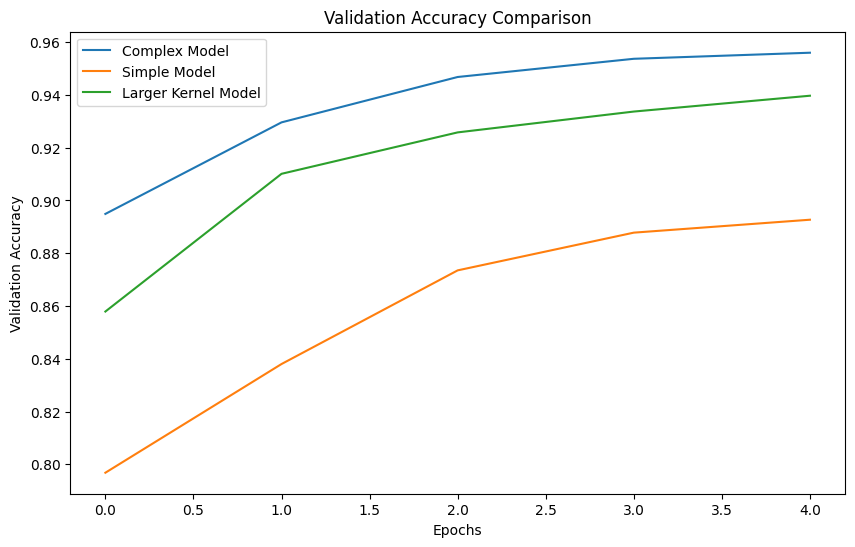

In [26]:
plt.figure(figsize=(10, 6))
for name, hist in results_architecture.items():
    plt.plot(hist['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


***Аналіз результатів на графіках:***

1. Графік точності (Accuracy):

*Складна модель (Complex Model):*

- Найвища точність як на тренувальному, так і на валідаційному наборі.
- Тренувальна точність швидко досягає ~98%, а валідаційна ~95.6%.
- Мінімальний розрив між тренувальною та валідаційною точністю, що свідчить про добре узагальнення.

*Модель із більшим ядром згортки (Larger Kernel Model):*

- Демонструє стабільний приріст точності, але нижчий, ніж у складної моделі (~93.97% валідаційна точність).
- Різниця між тренувальною і валідаційною точністю більша, що може вказувати на легке перенавчання.

*Спрощена модель (Simple Model):*

- Значно нижча точність (~89.27% валідаційна точність).
- Швидке зростання точності на початку, але повільніший приріст після 2-ї епохи.

2. Графік втрат (Loss):

Складна модель:
- Найменші значення втрат (валідованих і тренувальних), що свідчить про високу якість навчання.

Модель із більшим ядром:
- Значення втрат трохи вищі, але стабільно зменшуються.

Спрощена модель:
- Значно вищі втрати, як на тренувальному, так і на валідаційному наборі, що підтверджує недостатню складність моделі для задачі.

***Основні висновки:***

*Складна модель:*

- Найкращий вибір для досягнення високої точності (95.6%), але потребує більше ресурсів і часу.
- Підходить для складних задач, де точність є критичною.

*Модель із більшим ядром згортки:*

- Хороший баланс між точністю (~93.97%) і часом навчання.
- Підходить для задач, де точність не настільки критична, але час важливий.

*Спрощена модель:*

- Не підходить для задачі через низьку продуктивність (~89.27%), але може використовуватися для швидкого тестування.

##***Загальні висновки***

У ході виконання роботи ми дослідили вплив архітектури згорткових нейронних мереж на якість класифікації зображень із датасету KMNIST. Було реалізовано три різні архітектури: складна модель, спрощена модель, та модель із більшим ядром згортки. Усі моделі були навчені на одному й тому ж датасеті та проаналізовані за ключовими метриками: точністю (accuracy) та втратою (loss).

У рамках практичної роботи було розроблено три архітектури згорткових нейронних мереж (складна модель, модель із більшим ядром згортки та спрощена модель) для класифікації зображень датасету KMNIST. Складна модель показала найвищу точність на валідаційному наборі (95.6%) і найменшу втрату, проте потребує значного часу на навчання (~5 хвилин на епоху). Модель із більшим ядром згортки досягла компромісу між точністю (93.97%) і часом навчання (~1.5 хвилини на епоху), що робить її придатною для задач, де важлива швидкість. Спрощена модель навчалася найшвидше (~20 секунд на епоху), але мала значно нижчу точність (89.27%), що обмежує її використання задачами з невисокими вимогами до точності.

Результати експериментів демонструють, що складність архітектури безпосередньо впливає на точність і здатність до узагальнення, однак для практичного застосування важливо враховувати баланс між продуктивністю моделі та обчислювальними ресурсами. Надалі можливе використання більш складних архітектур (наприклад, ResNet) або оптимізація наявних моделей за допомогою методів регуляризації, функцій активації та оптимізаторів.

###***Контрольні питання***

1. Що таке згорткова нейронна мережа?

Згорткова нейронна мережа (CNN) — це тип штучної нейронної мережі, спеціально розроблений для ефективної обробки та аналізу даних, представлених у вигляді зображень чи сигналів, використовуючи операції згортки для автоматичного виділення важливих особливостей.

2. Які основні компоненти архітектури CNN?
Основні компоненти CNN:

Згортковий шар (Convolutional Layer): для виділення ознак за допомогою згорток.

Шар пулінгу (Pooling Layer): для зменшення розмірності ознак.

Повнозв’язний шар (Fully Connected Layer): для класифікації.

Активаційні функції (ReLU, ELU, тощо): для нелінійності.

Регуляризація (Dropout, Batch Normalization): для запобігання перенавчанню

3. Для чого використовується шар пулінгу?

Шар пулінгу використовується для зменшення розмірності простору ознак, знижуючи обчислювальну складність моделі та видаляючи зайвий шум. Це сприяє кращій узагальнювальній здатності мережі.

4. Чим відрізняється згортковий шар від повнозв'язного?

Згортковий шар працює локально, аналізуючи невеликі ділянки даних (наприклад, частини зображення) і виділяючи ознаки.
Повнозв’язний шар з'єднує всі нейрони кожного шару з усіма нейронами наступного шару, використовується для об'єднання ознак та класифікації.





5. Які проблеми можуть виникнути при тренуванні згорткової нейронної
мережі?

- Перенавчання (overfitting): модель добре працює на тренувальних даних, але погано узагальнює.
- Великий час навчання: через велику кількість параметрів.
- Втрата градієнтів: при використанні невідповідних функцій активації (наприклад, sigmoid).
- Потреба у великих обчислювальних ресурсах: особливо для глибоких мереж.
- Нестача даних: що може призвести до поганого узагальнення.